# Notes

# Load Modules

In [1]:
import numpy as np
import pandas as pd

import anndata as adata
import scanpy as sc
import squidpy as sq
from SpaceFlow import SpaceFlow

# Load Data

In [3]:
exp_df = pd.read_csv("./simulated_expression.csv", index_col=0)
exp_df.head()

,cell1,cell2,cell3,cell4,cell5,cell6,cell7,cell8,cell9,cell10,...,cell491,cell492,cell493,cell494,cell495,cell496,cell497,cell498,cell499,cell500
Burn1_TF1,8,9,8,6,6,10,3,14,7,2,...,6,9,13,8,11,6,10,12,2,3
Burn1_TF2,13,17,3,11,9,11,3,14,7,4,...,8,8,20,9,12,9,13,5,6,8
Burn1_TF3,17,9,15,11,11,16,14,16,10,6,...,9,15,21,13,21,16,16,16,11,12
Burn2_TF1,16,10,10,18,16,14,10,17,20,13,...,12,18,23,17,15,12,19,25,15,17
Burn3_TF1,15,11,9,4,21,12,5,11,7,5,...,4,7,6,14,10,10,9,15,5,5


In [ ]:
meta_info_df = pd.read_csv("./simulation_nonlinear_ontrac_input.csv", index_col=0)
meta_info_df.head()

,x,y,Niche_NTScore,Cell_NTScore,Ground_Truth,Cell_Type,Lineage
Cell_ID,,,,,,,
cell1,0.189955,0.723419,0.199948,0.199093,0.340023,I,3
cell2,0.898616,0.886213,0.004731,0.041554,0.235295,A,1
cell3,0.177252,0.572594,0.487955,0.445049,0.481424,I,3
cell4,0.977316,0.253594,0.886338,0.895616,0.793462,G,2
cell5,0.961119,0.982236,0.002581,0.014981,0.189996,A,1


In [5]:
ad = adata.AnnData(exp_df.T)

In [6]:
ad.X

array([[ 8, 13, 17, ...,  0,  0,  0],
       [ 9, 17,  9, ..., 10, 22,  7],
       [ 8,  3, 15, ...,  0,  0,  0],
       ...,
       [12,  5, 16, ..., 15, 21, 10],
       [ 2,  6, 11, ...,  0,  0,  0],
       [ 3,  8, 12, ...,  0,  0,  0]])

In [7]:
ad.obs_names

Index(['cell1', 'cell2', 'cell3', 'cell4', 'cell5', 'cell6', 'cell7', 'cell8',
       'cell9', 'cell10',
       ...
       'cell491', 'cell492', 'cell493', 'cell494', 'cell495', 'cell496',
       'cell497', 'cell498', 'cell499', 'cell500'],
      dtype='object', length=500)

In [8]:
ad.var_names

Index(['Burn1_TF1', 'Burn1_TF2', 'Burn1_TF3', 'Burn2_TF1', 'Burn3_TF1',
       'Burn3_TF2', 'Burn4_TF1', 'Burn5_TF1', 'A1_TF1', 'A1_TF2', 'A2_TF1',
       'A3_TF1', 'A3_TF2', 'A4_TF1', 'A4_TF2', 'B1_TF1', 'B1_TF2', 'B2_TF1',
       'B3_TF1', 'B3_TF2', 'B4_TF1', 'B4_TF2', 'B5_TF1', 'B6_TF1', 'C1_TF1',
       'C1_TF2', 'C2_TF1', 'C3_TF1', 'C4_TF1', 'C4_TF2', 'C5_TF1', 'C6_TF1',
       'C6_TF2', 'C7_TF1', 'C7_TF2', 'C8_TF1', 'C8_TF2', 'C8_TF3', 'C9_TF1',
       'C9_TF2', 'C10_TF1', 'C10_TF2', 'C11_TF1', 'C12_TF1', 'C12_TF2',
       'C13_TF1', 'C14_TF1', 'C14_TF2', 'D1_TF1', 'D2_TF1', 'D3_TF1', 'D4_TF1',
       'D4_TF2', 'D5_TF1', 'D5_TF2', 'D6_TF1', 'D7_TF1', 'D7_TF2', 'D8_TF1',
       'D9_TF1', 'D9_TF2', 'D10_TF1', 'D11_TF1', 'D11_TF2', 'D12_TF1',
       'D12_TF2', 'D12_TF3', 'D13_TF1', 'D13_TF2', 'D14_TF1', 'D14_TF2',
       'E1_TF1', 'E2_TF1', 'E3_TF1', 'E3_TF2', 'E3_TF3', 'E4_TF1', 'E5_TF1',
       'F1_TF1', 'F2_TF1', 'F2_TF2', 'F3_TF1', 'F3_TF2', 'F3_TF3', 'F4_TF1',
       'F4_TF2', 

In [9]:
ad.obs = ad.obs.join(meta_info_df)
ad.obs.head()

,x,y,Niche_NTScore,Cell_NTScore,Ground_Truth,Cell_Type,Lineage
cell1,0.189955,0.723419,0.199948,0.199093,0.340023,I,3
cell2,0.898616,0.886213,0.004731,0.041554,0.235295,A,1
cell3,0.177252,0.572594,0.487955,0.445049,0.481424,I,3
cell4,0.977316,0.253594,0.886338,0.895616,0.793462,G,2
cell5,0.961119,0.982236,0.002581,0.014981,0.189996,A,1


In [10]:
ad.obsm['spatial'] = ad.obs[['x', 'y']].values

# SpaceFlow

In [11]:
sf = SpaceFlow.SpaceFlow(adata=ad)

In [12]:
sf.preprocessing_data(n_top_genes=3000)

In [13]:
sf.train(spatial_regularization_strength=0.1, z_dim=50, lr=1e-3, epochs=1000, max_patience=50, min_stop=100, random_seed=42, gpu=0, regularization_acceleration=True, edge_subset_sz=1000000)

Epoch 2/1000, Loss: 3.8884174823760986
Epoch 12/1000, Loss: 1.584325909614563
Epoch 22/1000, Loss: 1.5967681407928467
Epoch 32/1000, Loss: 1.4533754587173462
Epoch 42/1000, Loss: 1.4577561616897583
Epoch 52/1000, Loss: 1.446679949760437
Epoch 62/1000, Loss: 1.4420374631881714
Epoch 72/1000, Loss: 1.4341834783554077
Epoch 82/1000, Loss: 1.4410206079483032
Epoch 92/1000, Loss: 1.4237825870513916
Epoch 102/1000, Loss: 1.4333922863006592
Epoch 112/1000, Loss: 1.4270031452178955
Epoch 122/1000, Loss: 1.4251006841659546
Epoch 132/1000, Loss: 1.4204598665237427
Epoch 142/1000, Loss: 1.4199604988098145
Epoch 152/1000, Loss: 1.4027296304702759
Epoch 162/1000, Loss: 1.4057801961898804
Epoch 172/1000, Loss: 1.403363823890686
Epoch 182/1000, Loss: 1.370269775390625
Epoch 192/1000, Loss: 1.3937160968780518
Epoch 202/1000, Loss: 1.4057875871658325
Epoch 212/1000, Loss: 1.3615305423736572
Epoch 222/1000, Loss: 1.3419767618179321
Epoch 232/1000, Loss: 1.315801739692688
Epoch 242/1000, Loss: 1.35655081

array([[-0.19212465, -0.40189043, -0.5800811 , ..., -0.12960789,
         0.2201553 ,  1.2056655 ],
       [-0.16620415, -0.40907627, -0.5972732 , ..., -0.18908359,
         0.29135972,  0.73690736],
       [-0.23607902, -0.3941578 , -0.59418786, ..., -0.17951839,
         0.25234097,  1.0483694 ],
       ...,
       [-0.25415516, -0.3970382 , -0.6141088 , ..., -0.1240408 ,
         0.78323007,  0.46943048],
       [-0.08670382, -0.33697712, -0.5921117 , ..., -0.23253292,
         0.11530359,  0.04291064],
       [-0.13927048, -0.38938728, -0.62076455, ..., -0.27101523,
        -0.04741761,  0.81340355]], dtype=float32)

In [14]:
sf.segmentation(domain_label_save_filepath="./domains.tsv", n_neighbors=50, resolution=1.0)

Performing domain segmentation


/sc/arion/work/wangw32/conda-env/envs/spaceflow/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/sc/arion/work/wangw32/conda-env/envs/spaceflow/lib/python3.9/site-packages/SpaceFlow/SpaceFlow.py:306: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(embedding_adata, resolution=float(resolution))


Segmentation complete, domain labels of cells or spots saved at ./domains.tsv !


No segmentation data found, please ensure you have run the segmentation() method.


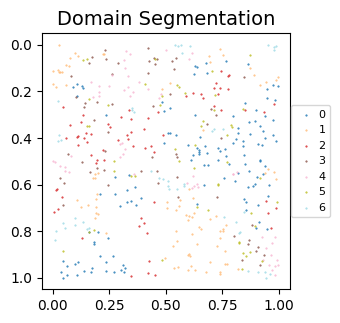

In [15]:
sf.plot_segmentation(segmentation_figure_save_filepath="./domain_segmentation.pdf", colormap="tab20", scatter_sz=1., rsz=4., csz=4., wspace=.4, hspace=.5, left=0.125, right=0.9, bottom=0.1, top=0.9)

In [16]:
sf.pseudo_Spatiotemporal_Map(pSM_values_save_filepath="./pSM_values.tsv", n_neighbors=20, resolution=1.0)

Performing pseudo-Spatiotemporal Map
pseudo-Spatiotemporal Map(pSM) calculation complete, pSM values of cells or spots saved at ./pSM_values.tsv!


In [17]:
sf.plot_pSM(pSM_figure_save_filepath="./pseudo-Spatiotemporal-Map.pdf", colormap="roma", scatter_sz=1., rsz=4., csz=4., wspace=.4, hspace=.5, left=0.125, right=0.9, bottom=0.1, top=0.9)

Plotting complete, pseudo-Spatiotemporal Map figure saved at ./pseudo-Spatiotemporal-Map.pdf !
